In [41]:
import pandas as pd
import matplotlib.pyplot as plt
dF_stores=pd.read_csv('stores.csv')
dF_products=pd.read_csv('products.csv')
dF_customers=pd.read_csv('customers.csv')
dF_tickets=pd.read_csv('tickets.csv')

In [42]:
dF_day=dF_tickets.groupby(['customerid','datekey'])['extendedamount'].sum()
dF_JR=dF_day.reset_index().pivot(index="customerid", columns="datekey", values="extendedamount").fillna(0)
dF_JR["avg_compra_diaria"]=dF_JR.mean(axis=1)
dF_JR.head()

datekey,2019-01-03,2019-01-04,2019-01-05,2019-01-10,2019-01-11,2019-01-12,2019-01-14,2019-01-19,2019-01-24,2019-01-31,...,2019-03-08,2019-03-11,2019-03-14,2019-03-16,2019-03-18,2019-03-21,2019-03-23,2019-03-25,2019-03-30,avg_compra_diaria
customerid,,,,,,,,,,,,,,,,,,,,,
77000000050003334,0.0,0.00,0.0,0.00,33.14,0.0,0.00,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,4.965333
77000000050010221,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.110000
77000000050012258,0.0,0.00,0.0,39.24,0.00,0.0,38.13,0.0,18.15,5.06,...,0.0,0.0,3.99,0.0,0.00,34.22,0.0,0.0,0.0,4.626333
77000000050014586,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,2.37,0.00,...,0.0,0.0,5.90,0.0,15.19,0.00,0.0,0.0,0.0,1.993000
77000000050014974,11.2,27.91,0.0,0.00,22.22,0.0,0.00,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,3.236333


In [43]:
data=pd.DataFrame()
data['avg_compra_diaria'] = dF_JR['avg_compra_diaria']
data_Final = data.merge(dF_customers, on="customerid", how = 'inner')
data_Final=data_Final.fillna(0)
data_Final.head(20)

,customerid,avg_compra_diaria,isocountrycode,regularstoreid,registrationdate,unregistrationdate,gender,age,zipcode
0,77000000050003334,4.965333,ES,ES4507,2017-11-26,0,0,0.0,0
1,77000000050010221,1.110000,ES,ES0428,2017-11-26,0,0,0.0,0
2,77000000050012258,4.626333,ES,ES4504,2017-11-26,0,0,0.0,0
3,77000000050014586,1.993000,ES,ES0263,2017-11-26,0,0,0.0,0
4,77000000050014974,3.236333,ES,ES4503,2017-11-26,0,0,0.0,0
5,77000000050015653,0.893667,ES,ES0428,2017-11-26,0,F,40.0,50010
6,77000000050019145,0.260333,ES,ES0428,2017-11-27,0,F,32.0,50011
7,77000000050027196,4.063667,ES,ES4503,2017-11-27,0,0,0.0,0
8,77000000050028748,2.329667,ES,ES4507,2017-11-27,0,0,0.0,0
9,77000000050034471,2.219000,ES,ES0428,2017-11-27,0,0,0.0,0


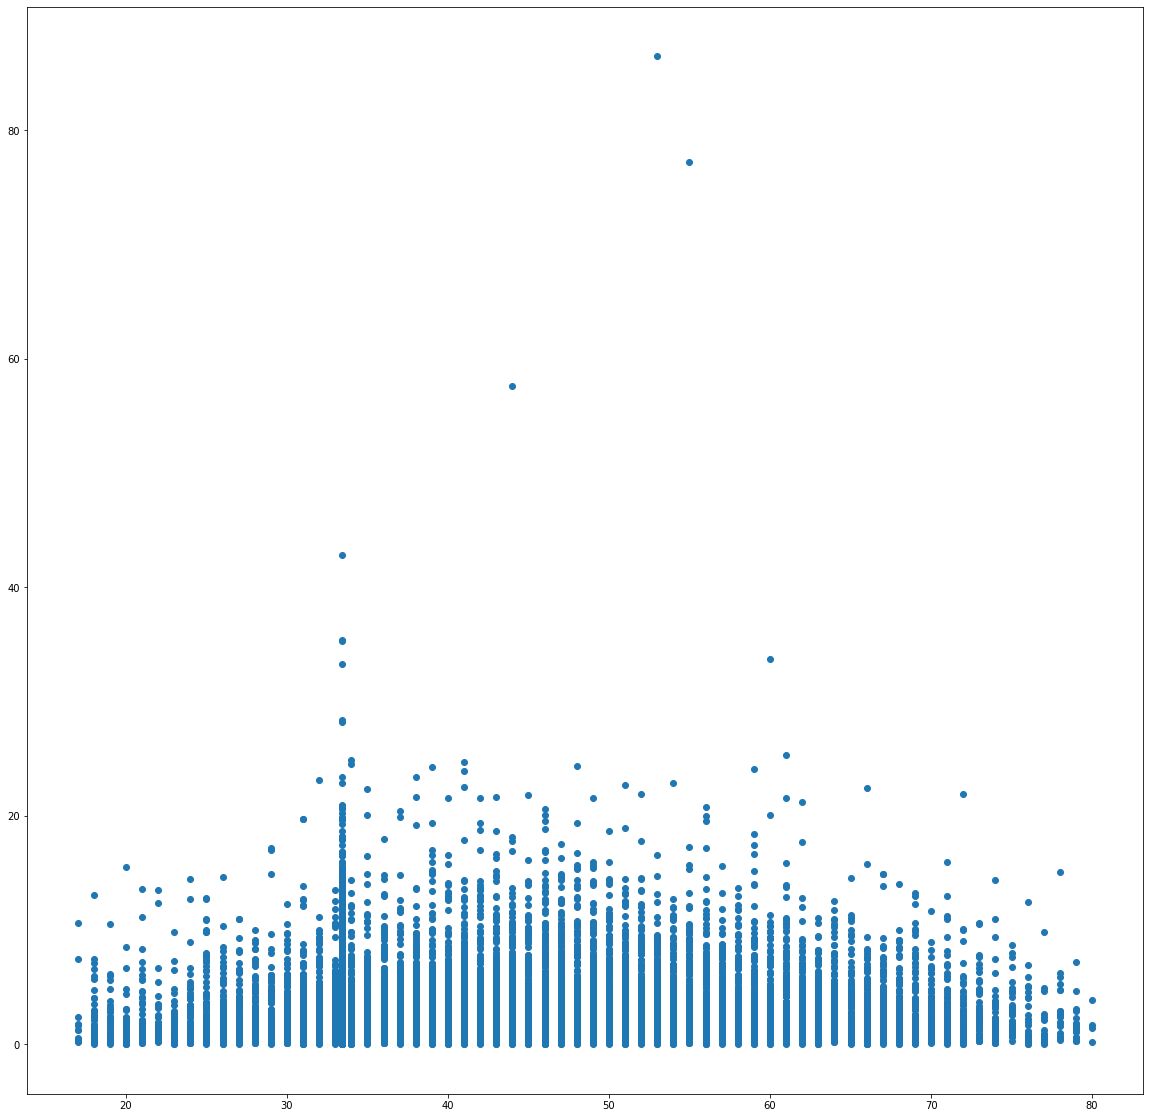

In [44]:
data_Final.loc[(data_Final.age < 15.0) | (data_Final.age > 80.0), 'age'] = data_Final.age.mean()
# también hay gente que tiene 33.5 años pero los he dejado
plt.rcParams['figure.figsize'] =[20, 20]
dataplotty = data_Final[['avg_compra_diaria', 'age']].copy()
dataplotty['avg_compra_diaria'] = dataplotty['avg_compra_diaria']
dataplotty['age'] = dataplotty['age']
plt.scatter(dataplotty.values[:, 1], dataplotty.values[:, 0], cmap='rainbow')